<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML241ENSkillsNetwork820-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# ***Machine Learning Foundation***

## ***Support Vector Machines DEMO***

$ \ $

----

## ***Introduction***

We will be using the wine quality data set for these exercises. This data set contains various chemical properties of wine, such as:

* acidity,

* sugar, 

* pH, 

* alcohol. 

It also contains a quality metric (3-9, with highest being better) and a color (red or white). The name of the file is `Wine_Quality_Data.csv`.


$ \ $

-----

## ***Import packages and ignore any deprecation warnings.***

$ \ $

We import the necessary packages and we ignore any deprecation warnings.

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.kernel_approximation import Nystroem
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

$ \ $

----

## ***Exercise (setup)***

$ \ $

$(1)$  Import the data.


In [3]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/Wine_Quality_Data.csv", sep = ',')
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


$ \ $

$(2)$ Create the target variable `y` as a binary column (only with values 0 and 1) where 1 means red.


In [4]:
data['color'].value_counts()

white    4898
red      1599
Name: color, dtype: int64

In [5]:
# creamos una mascara en la columna ata['color']  tomando a "red" = "True"
y = (data['color'] == 'red').astype(int)
y

0       1
1       1
2       1
3       1
4       1
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: color, Length: 6497, dtype: int64

$ \ $

$(3)$ We get the correlation between "color" and the predictive variables.

In [6]:
# describimos todas las columnas, excepto la ultima 
fields = list(data.columns[:-1])  

#  computamos la correlacion de todas las columnas de data[fields] con y
correlations = data[fields].corrwith(y)

# ordenamos de menor a mayor el diccionario (o frame) anterior, teniendo en cuenta los resultados anteriores
correlations.sort_values(inplace = True)

# mostramos en pantalla los resultados
correlations

total_sulfur_dioxide   -0.700357
free_sulfur_dioxide    -0.471644
residual_sugar         -0.348821
citric_acid            -0.187397
quality                -0.119323
alcohol                -0.032970
pH                      0.329129
density                 0.390645
fixed_acidity           0.486740
sulphates               0.487218
chlorides               0.512678
volatile_acidity        0.653036
dtype: float64

$ \ $

$(4)$ Create a `pairplot` for the dataset.

In [7]:
sns.pairplot(data, hue = "color")

Output hidden; open in https://colab.research.google.com to view.

$ \ $

$(4)$ Create a bar plot showing the correlations between each column and `y`.


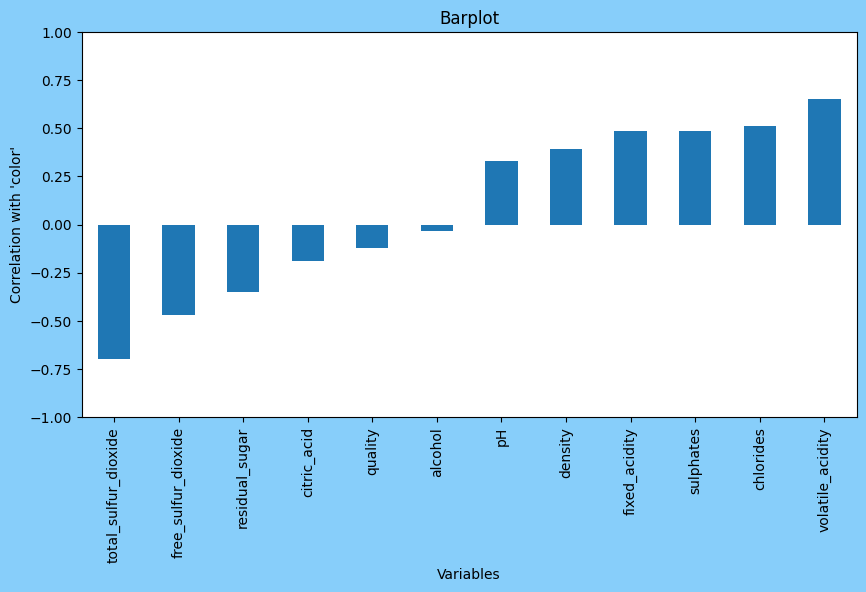

In [8]:
fig = plt.figure(figsize = (10, 5), facecolor = 'lightskyblue')
ax = correlations.plot(kind = 'bar')
ax.set(ylim=[-1, 1], ylabel ='pearson correlation');

plt.xlabel("Variables")
plt.ylabel("Correlation with 'color'")
plt.title("Barplot");

$ \ $

$(5)$ Pick the most 2 correlated fields (using the absolute value of correlations) and create `X`.

In [9]:
correlations.map(abs).sort_values()

alcohol                 0.032970
quality                 0.119323
citric_acid             0.187397
pH                      0.329129
residual_sugar          0.348821
density                 0.390645
free_sulfur_dioxide     0.471644
fixed_acidity           0.486740
sulphates               0.487218
chlorides               0.512678
volatile_acidity        0.653036
total_sulfur_dioxide    0.700357
dtype: float64

In [10]:
# describimos los valores de correlations en valor absoluto, luego los ordenamos de menor a mayor y luego tomamos los dos resultados  mas grandes
fields = correlations.map(abs).sort_values().iloc[-2:].index
fields

Index(['volatile_acidity', 'total_sulfur_dioxide'], dtype='object')

In [11]:
# tomamos las dos columnas de las variables 'volatile_acidity', 'total_sulfur_dioxide' sobre el dataframe data
X = data[fields]
X

,volatile_acidity,total_sulfur_dioxide
0,0.70,34.0
1,0.88,67.0
2,0.76,54.0
3,0.28,60.0
4,0.70,34.0
...,...,...
6492,0.21,92.0
6493,0.32,168.0
6494,0.24,111.0
6495,0.29,110.0



$ \ $

$(6)$ Use MinMaxScaler to scale `X`. Note that this will output a np.array. Make it a DataFrame again and rename the columns appropriately.

In [12]:
# creamos un modelo MinMaxScaler()
scaler = MinMaxScaler()

# usamos el modelo scaler sobre X
X = scaler.fit_transform(X)

# convertimos nuestra data en un dataframe
X = pd.DataFrame(X, columns = ['volatile_acidity', 'total_sulfur_dioxide'])
X

,volatile_acidity,total_sulfur_dioxide
0,0.413333,0.064516
1,0.533333,0.140553
2,0.453333,0.110599
3,0.133333,0.124424
4,0.413333,0.064516
...,...,...
6492,0.086667,0.198157
6493,0.160000,0.373272
6494,0.106667,0.241935
6495,0.140000,0.239631


$ \ $

----

## ***Exercise (Linear Decision Boundary)***

$ \ $

Our goal is to look at the decision boundary of a LinearSVC classifier on this dataset. Check out [this example](https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML241ENSkillsNetwork820-2023-01-01#sphx-glr-auto-examples-svm-plot-iris-svc-py) in sklearn's documentation. 

$ \ $

$(1)$  Fit a Linear Support Vector Machine Classifier to `X`, `y`.

In [13]:
LSVC = LinearSVC()
LSVC.fit(X, y)

LinearSVC()

$ \ $

$(2)$  Pick 300 samples from `X`. Get the corresponding `y` value. Store them in variables `X_color` and `y_color`. This is because original dataset is too large and it produces a crowded plot.

In [14]:
X_color = X.sample(300, random_state = 45)
y_color = y.loc[X_color.index]



$ \ $

$(3)$  Modify `y_color` so that it has the value "red" instead of 1 and 'yellow' instead of 0.

In [15]:
y_color = y_color.map(lambda r: 'red' if r == 1 else 'yellow')

$ \ $

$(4)$  Scatter plot X_color's columns. Use the keyword argument "color = y_color" to color code samples.

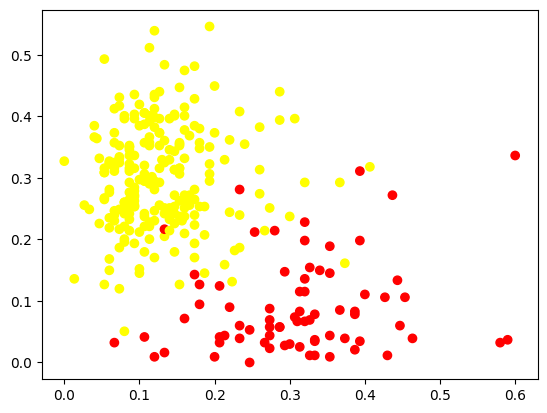

In [16]:
# creamos los ejes del plot
ax = plt.axes()

# realizamos un scatter plot sobre las  2 columnas de X_color
col_1 = X_color.iloc[:, 0]
col_2 = X_color.iloc[:, 1]
ax.scatter(col_1, col_2 , color = y_color, alpha = 1);

$ \ $

$(5)$  Use the code snippet below to plot the decision surface in a color coded way.

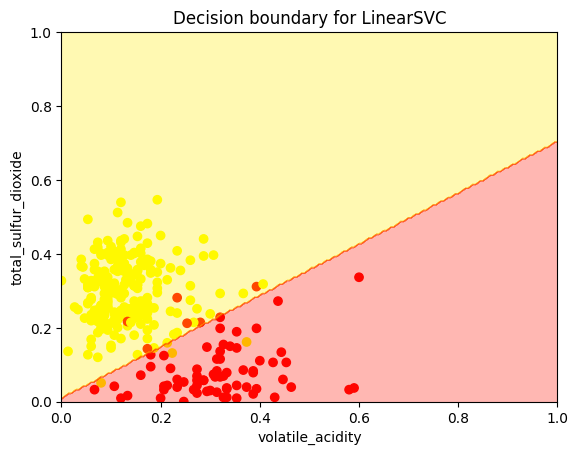

In [17]:
# creamos los ejes del plot
ax = plt.axes()

# realizamos un scatter plot sobre las  2 columnas de X_color
col_1 = X_color.iloc[:, 0]
col_2 = X_color.iloc[:, 1]
ax.scatter(col_1, col_2 , color = y_color, alpha = 1);

# creamos dos listas de numeros 
x_axis, y_axis = np.arange(0, 1.005, 0.005), np.arange(0, 1.005, 0.005)

# realizamos una grilla teniedno en cuenta las listas de numeros creadas anteriormente
xx, yy = np.meshgrid(x_axis, y_axis)

# Se devuelve una matriz 1-D que contiene los elementos de xx
xx_ravel = xx.ravel()

# Se devuelve una matriz 1-D que contiene los elementos de yy
yy_ravel = yy.ravel()

# describimos un dataframe que describe la data en forma de renglones
matrix = pd.DataFrame([xx_ravel, yy_ravel])

# calculamos la transpuesta de la matriz anterior (col_1 = xx_ravel y col_2 = yy_ravel)
X_grid = matrix.T

# usamos el modelo lineal SVC creado y entrenado anteriormente para predecir un conjunto de datos, teniendo como datos de prueba a X_grid
y_grid_predictions = LSVC.predict(X_grid)

# ajustamos el modelo predecido anteriormente al tamaño xx.shape )recordar el juego de la serpiente)
y_grid_predictions = y_grid_predictions.reshape(xx.shape)

# realizamos el dibujo de los semiplanos y el hiperplano 
ax.contourf(xx, yy, y_grid_predictions, cmap = plt.cm.autumn_r, alpha = 0.3)

# establecemos las etiquetas de los ejes, los limites que apareceran en el plot y el titulo
ax.set(xlabel = fields[0],
       ylabel = fields[1],
       xlim = [0, 1],
       ylim = [0, 1],
       title = 'Decision boundary for LinearSVC');

$ \ $

----

## ***Exercise (Gaussian Kernel)***

$ \ $

Let's now fit a Gaussian kernel SVC and see how the decision boundary changes.

$ \ $

$(1)$  Consolidate the code snippets in Question 2 into one function which takes in:

$ \ $

$(\checkmark)$ $\text{Variables} =\begin{cases}\text{an estimator},\\ \\ \text{`X` and `y`.} \end{cases}$

$ \ $

$(\checkmark)$ $\text{Result}=$ it produces the final plot with decision boundary.

$ \ $


The steps are:


* Fit model.


* Get sample 300 records from X and the corresponding y's.


* Create grid, predict, plot using ax.contourf.


* Add on the scatter plot.


In [18]:
def plot_decision_boundary(estimator, X, y):

  # entrenamos nuestro estimador con la data X e y
  estimator.fit(X, y)

  # tomamos una muestra de 300 registros de X
  X_color = X.sample(300, random_state = 45)

  # tomamos una muestra de 300 registros de y
  y_color = y.loc[X_color.index]
  y_color = y_color.map(lambda r: 'red' if r == 1 else 'yellow')

  # realizamos un scatter plot sobre las  2 columnas de X_color
  col_1 = X_color.iloc[:, 0]
  col_2 = X_color.iloc[:, 1]

  # creamos dos listas de numeros 
  x_axis, y_axis = np.arange(0, 1.005, 0.005), np.arange(0, 1.005, 0.005)

  # realizamos una grilla teniedno en cuenta las listas de numeros creadas anteriormente
  xx, yy = np.meshgrid(x_axis, y_axis)

  # Se devuelve una matriz 1-D que contiene los elementos de xx
  xx_ravel = xx.ravel()

  # Se devuelve una matriz 1-D que contiene los elementos de yy
  yy_ravel = yy.ravel()

  # describimos un dataframe que describe la data en forma de renglones
  matrix = pd.DataFrame([xx_ravel, yy_ravel])

  # calculamos la transpuesta de la matriz anterior (col_1 = xx_ravel y col_2 = yy_ravel)
  X_grid = matrix.T

  # usamos el modelo lineal SVC creado y entrenado anteriormente para predecir un conjunto de datos, teniendo como datos de prueba a X_grid
  y_grid_predictions = estimator.predict(X_grid)

  # ajustamos el modelo predecido anteriormente al tamaño xx.shape )recordar el juego de la serpiente)
  y_grid_predictions = y_grid_predictions.reshape(xx.shape)

  # creamos la imagen donde describiremos los subplots
  fig, ax = plt.subplots(figsize = (5, 5))

  # realizamos el dibujo de los semiplanos y el hiperplano 
  ax.contourf(xx, yy, y_grid_predictions, cmap = plt.cm.autumn_r, alpha = 0.3)

  # creamos el scatterplot
  ax.scatter(col_1, col_2 , color = y_color, alpha = 1);

  # establecemos las etiquetas de los ejes, los limites que apareceran en el plot y el titulo
  ax.set(xlabel = fields[0],
         ylabel = fields[1],
         xlim = [0, 1],
         ylim = [0, 1],
         title = str(estimator));

  # resultado de la funcion
  return ax

$ \ $

$(2)$   For the values of `gammas = [0.5, 1, 2, 10]`, create a Gaussian Kernel SVC and plot the decision boundary.  

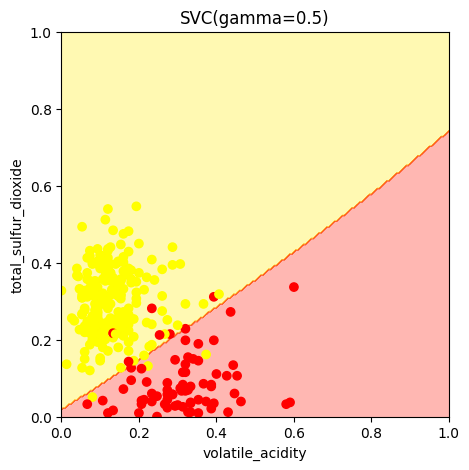

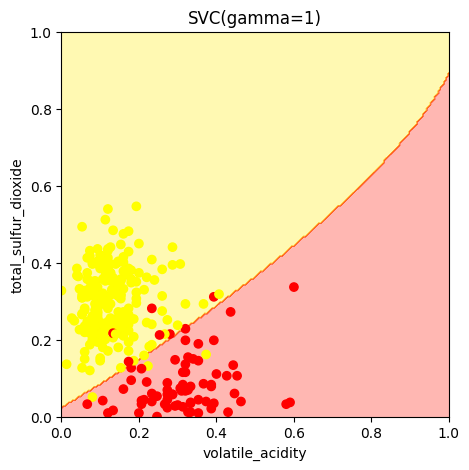

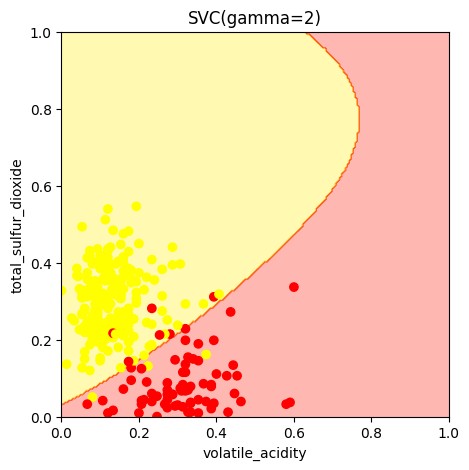

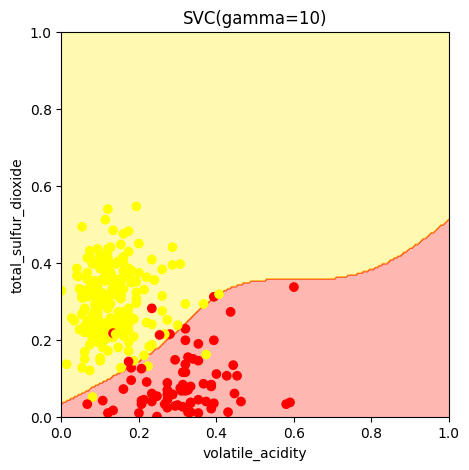

In [19]:
# describimos la lista dada
gammas = [0.5, 1, 2, 10]

# realizamos una iteracion sobre los elementos de la lista gammas
for gamma in gammas:

    # usamos el modelo SVC con los parametros dados, teniendo en cuenta iterador
    SVC_Gaussian = SVC(kernel = 'rbf', gamma = gamma)

    # usamos la funcion creada anteriormente teniendo en cuenta que estimator = SVC_Gaussian
    plot_decision_boundary(SVC_Gaussian, X, y)

$ \ $

$(4)$   Holding `gamma` constant, we plot the decision boundary for various values of `C=[0.1, 1, 10]`.

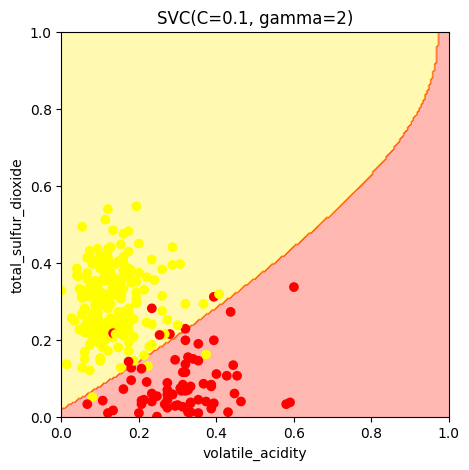

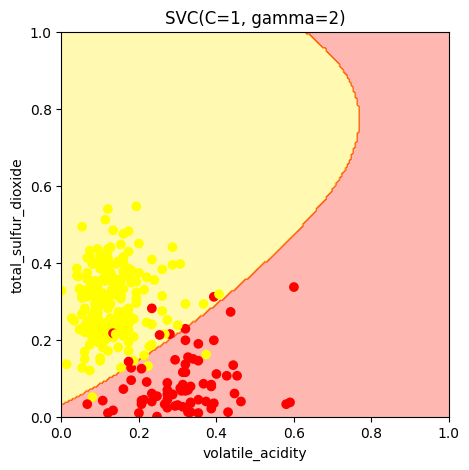

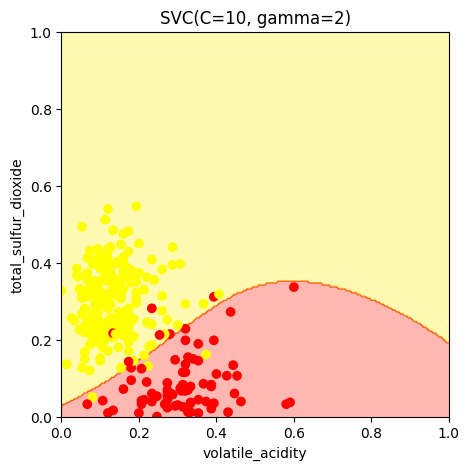

In [20]:
# Creamos la lista dada en el literal
Cs = [0.1, 1, 10]

# realizamos una iteracion sobre los elementos de la lista
for C in Cs:

    # usamos el modelo SVC con los parametros dados, teniendo en cuenta iterador. En este caso, tomaremos gamma = 2 (constante)
    SVC_Gaussian = SVC(kernel = 'rbf', gamma = 2, C = C)

    # usamos la funcion creada anteriormente para mostrar los plots
    plot_decision_boundary(SVC_Gaussian, X, y)

$ \ $ 

----

## ***Note (Jupyter notebook and the function `%timeit`)***

Jupyter Notebooks provide a useful magic function **`%timeit`** which executes a line and prints out the time it took to fit. If we type **`%%timeit`** in the beginning of the cell, it will output the execution time.

$ \ $

----

## ***Exercise (Comparing Kernel Execution Times)***

In this exercise, we will compare the fitting times between

*  SVC 

*  Nystroem 

with rbf kernel. To do this, we have the following steps:


$ \ $

$(1)$ Create `y` from data["color"], and `X` from the rest of the columns.

In [21]:
# tomamos todas las columnas excepto la ultima
X = data[data.columns[:-1]]

# creamos una mascara con los valores de verdadero y falso
y = (data["color"] == "red")

$ \ $

$(2)$  Use `%%timeit` to get the time for fitting an SVC with kernel = "rbf" .

In [22]:
%%timeit
svc = SVC(kernel = 'rbf') 
svc.fit(X, y)

551 ms ± 148 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


$ \ $

$(3)$  Use `%%timeit` to get the time for the following: 

* fit_transform the data with Nystroem,

* fit a SGDClassifier.

In [23]:
%%timeit

# creamos y entrenamos un modelo Nystroem con los parametros predeterminados
nystroem = Nystroem(kernel = 'rbf')
X_transformed = nystroem.fit_transform(X)

# creamos y entrenamos un modelo SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_transformed, y)

255 ms ± 57.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


$ \ $

$(5)$ Make 5 copies of $X$ and concatenate them.

In [24]:
X2 = pd.concat([X]*5)
X2.shape

(32485, 12)

$ \ $

$(6)$  Make 5 copies of $y$ and concatenate them.

In [25]:
y2 = pd.concat([y]*5)
y2.shape

(32485,)

$ \ $

$(7)$  Compare the time that the new data takes to fit the both methods above.

In [26]:
%%timeit

nystroem = Nystroem(kernel = 'rbf')
X2_transformed = nystroem.fit_transform(X2)

# creamos y entrenamos un modelo SGDClassifier
sgd = SGDClassifier()
sgd.fit(X2_transformed, y2)

573 ms ± 26 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
